In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# usaremos el MLP con activacion RBF (SKlearn no tiene RBF nativo, lo simularemos)
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import  accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
# cargar el dataset iris
iris = load_iris()
X, y = iris.data, iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [4]:
# estandarizar los datos (importante para RBF)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [5]:
# simular una capa RBF usando K means para los centros y una transformacion gaussiana


class RBFLayer:
    def __init__(self, n_centers=10, gamma=1.0):
        self.gamma = gamma
        self.n_centers = n_centers
        self.kmeans = KMeans(n_clusters=n_centers)
        self.centers = None

    def fit(self, X):
        self.kmeans = KMeans(n_clusters=self.n_centers, random_state=40)
        self.kmeans.fit(X)
        self.centers = self.kmeans.cluster_centers_

    def transform(self, X):
        # calcular la distancia euclidiana y aplicar la funcion gaussiana RBF
        distances = np.array([np.linalg.norm(X - center, axis=1) for center in self.centers]).T
        return np.exp(-distances * distances**2)  # aplicar la funcion gaussiana
    

In [6]:
# aplicar la capa RBF
rbf_layer = RBFLayer(n_centers=20, gamma=0.5)
rbf_layer.fit(x_train)
x_train_rbf = rbf_layer.transform(x_train)

# transformacion datos de prueba
x_test_rbf = rbf_layer.transform(x_test)


In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=40)
mlp.fit(x_train_rbf, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=40)

In [8]:
# predecir y evaluar
y_pred = mlp.predict(x_test_rbf)


In [9]:
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score:.2f}")

Accuracy: 0.91


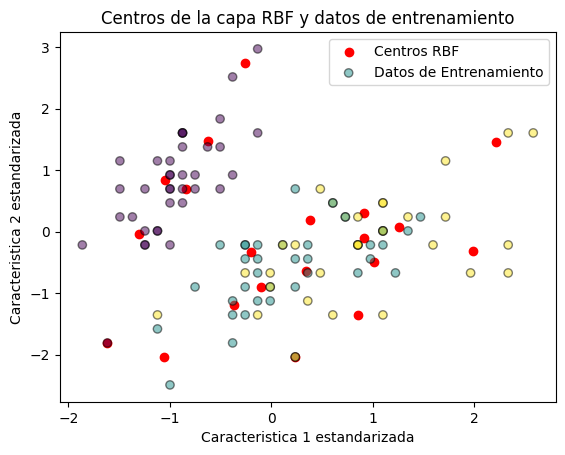

In [10]:
# visualizar los rsultados
plt.scatter(
    rbf_layer.centers[:, 0], rbf_layer.centers[:, 1], c="red", label="Centros RBF"
)
plt.scatter(
    x_train[:, 0],
    x_train[:, 1],
    c=y_train,  # classifier, usa y_train para clasifiicar por colores
    cmap="viridis",
    label="Datos de Entrenamiento",
    alpha=0.5,
    edgecolor="k",
)
plt.xlabel("Caracteristica 1 estandarizada")
plt.ylabel("Caracteristica 2 estandarizada")
plt.title("Centros de la capa RBF y datos de entrenamiento")
plt.legend()
plt.show()